In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, mutual_info_regression, mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

%matplotlib inline

In [3]:
from mll_calc.mll_pred import format_XY

In [4]:
pklfile = '~/sims_n_results/simupdates_aug2020/not-scaled_nuc29.pkl'
XY = format_XY(pklfile)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
nonlbls = ['AvgPowerDensity', 'ModDensity', 'UiWeight']

X = XY.drop(lbls+nonlbls, axis=1)

In [5]:
X.columns

Index(['am241', 'am242m', 'am243', 'cm242', 'cm244', 'cs134', 'cs137', 'eu154',
       'nd143', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'np237', 'pu238',
       'pu239', 'pu240', 'pu241', 'pu242', 'sm147', 'sm149', 'sm150', 'sm151',
       'sm152', 'u234', 'u235', 'u236', 'u238'],
      dtype='object')

# Feature Distrubitions

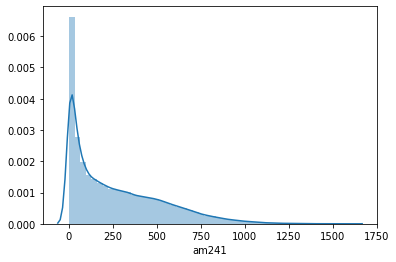

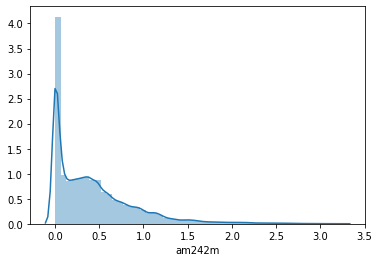

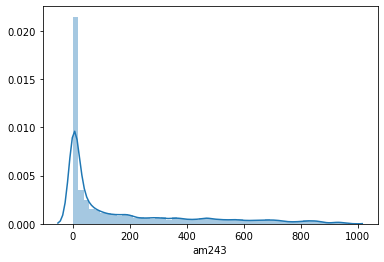

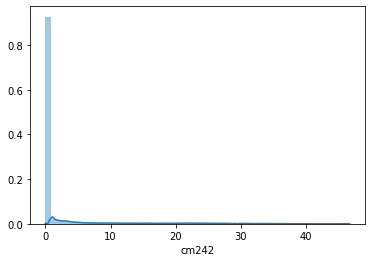

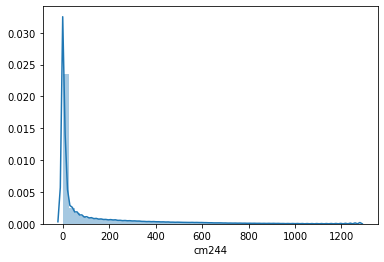

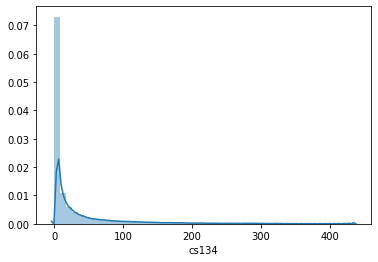

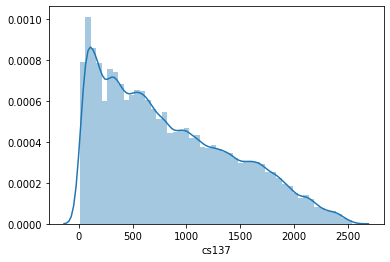

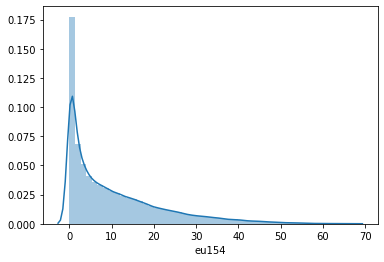

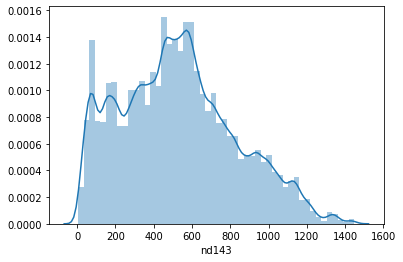

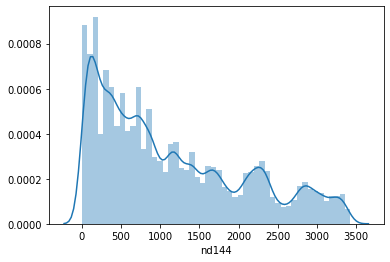

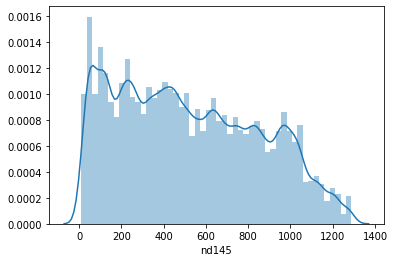

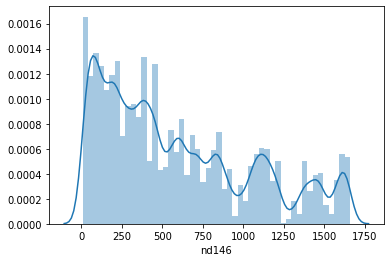

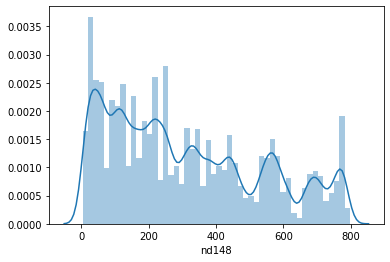

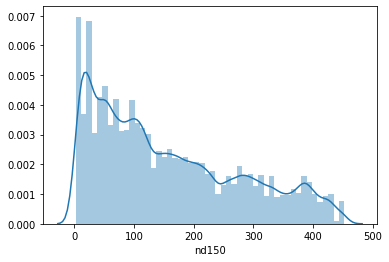

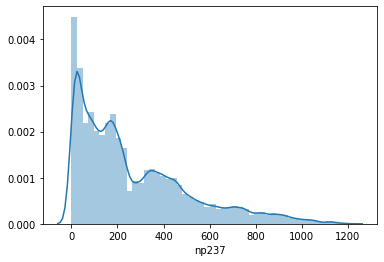

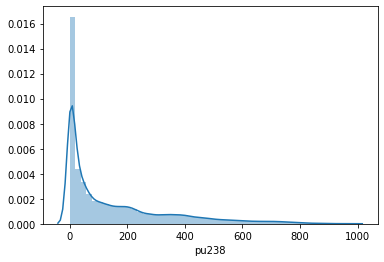

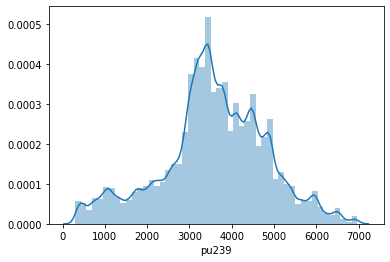

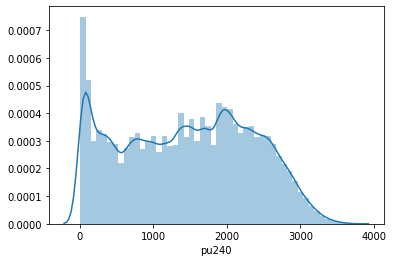

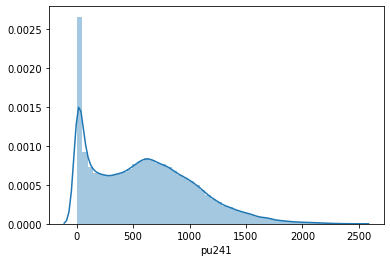

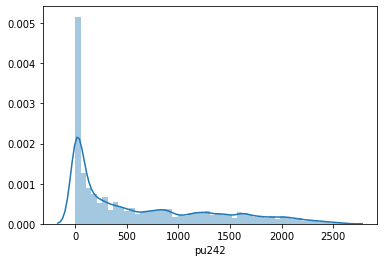

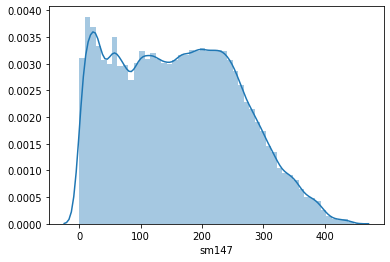

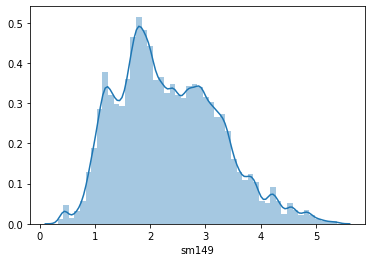

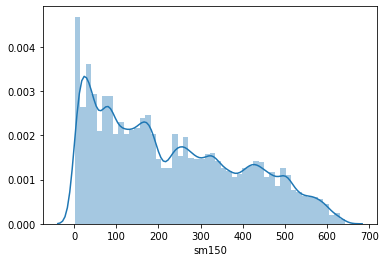

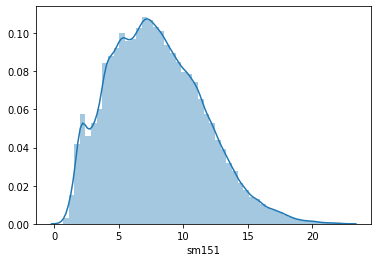

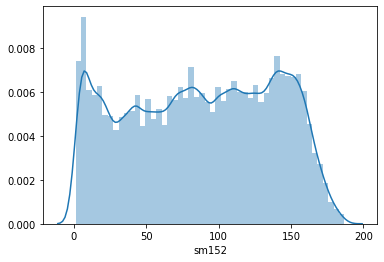

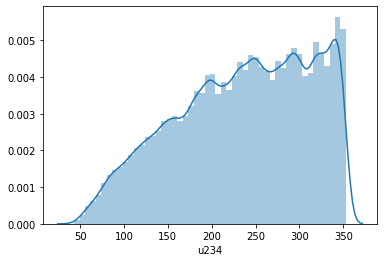

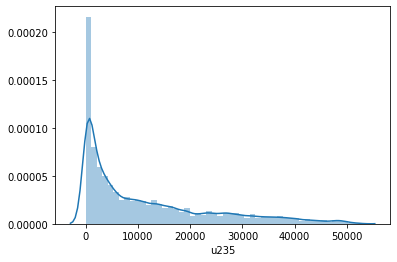

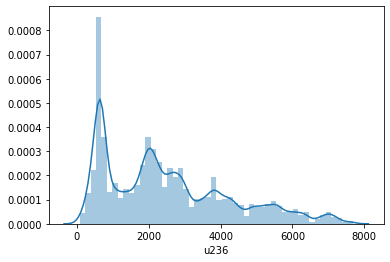

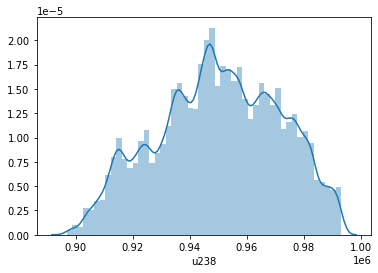

In [6]:
for iso in X.columns.tolist():
    sns.distplot(X[iso])
    plt.show()

# Feature Importance
## Using Decision Trees

In [6]:
burn = XY['Burnup']
rxtr = XY['ReactorType']
cool = XY['CoolingTime']
enri = XY['Enrichment']

In [7]:
dtree_burn = DecisionTreeRegressor()
dtree_rxtr = DecisionTreeClassifier()
dtree_cool = DecisionTreeRegressor()
dtree_enri = DecisionTreeRegressor()

In [8]:
dtree_burn.fit(X,burn)
burn_tree_impt = pd.Series(dtree_burn.feature_importances_, index=X.columns)

In [9]:
dtree_rxtr.fit(X,rxtr)
rxtr_tree_impt = pd.Series(dtree_rxtr.feature_importances_, index=X.columns)

In [10]:
dtree_cool.fit(X,cool)
cool_tree_impt = pd.Series(dtree_cool.feature_importances_, index=X.columns)

In [11]:
dtree_enri.fit(X,enri)
enri_tree_impt = pd.Series(dtree_enri.feature_importances_, index=X.columns)

## Using KBest Feature Selection

In [12]:
bestfeatures_f = SelectKBest(score_func=f_regression, k=29)
bestfeatures_mi = SelectKBest(score_func=mutual_info_regression, k=29)
bestfeatures_fclass = SelectKBest(score_func=f_classif, k=29)
bestfeatures_chi = SelectKBest(score_func=chi2, k=29)

In [13]:
kbest_f_burn = bestfeatures_f.fit(X,burn)
burn_f_scores = pd.Series(kbest_f_burn.scores_, index=X.columns)

In [14]:
#kbest_mi_burn = bestfeatures_mi.fit(X,burn)
#burn_mi_scores = pd.Series(kbest_mi_burn.scores_, index=X.columns)

In [15]:
kbest_f_rxtr = bestfeatures_fclass.fit(X,rxtr)
rxtr_f_scores = pd.Series(kbest_f_rxtr.scores_, index=X.columns)

In [16]:
#kbest_chi_rxtr = bestfeatures_chi.fit(X,rxtr)
#rxtr_chi_scores = pd.Series(kbest_chi_rxtr.scores_, index=X.columns)

In [17]:
kbest_f_cool = bestfeatures_f.fit(X,cool)
cool_f_scores = pd.Series(kbest_f_cool.scores_, index=X.columns)

In [18]:
#kbest_mi_cool = bestfeatures_mi.fit(X,cool)
#cool_mi_scores = pd.Series(kbest_mi_cool.scores_, index=X.columns)

In [19]:
kbest_f_enri = bestfeatures_f.fit(X,enri)
enri_f_scores = pd.Series(kbest_f_enri.scores_, index=X.columns)

In [20]:
#kbest_mi_enri = bestfeatures_mi.fit(X,enri)
#enri_mi_scores = pd.Series(kbest_mi_enri.scores_, index=X.columns)

## Results 
#### Grouped by prediction type

In [21]:
n = 7

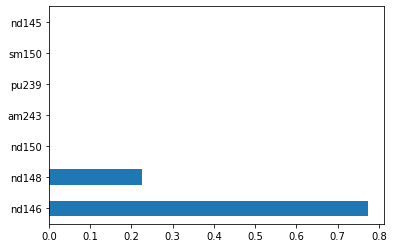

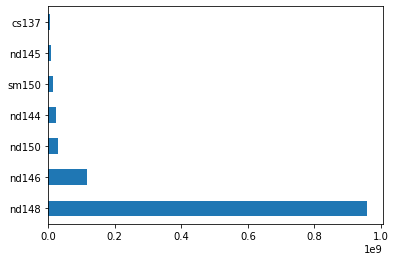

In [22]:
burn_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
burn_f_scores.nlargest(n).plot(kind='barh')
plt.show()
#burn_mi_scores.nlargest(n).plot(kind='barh')
#plt.show()

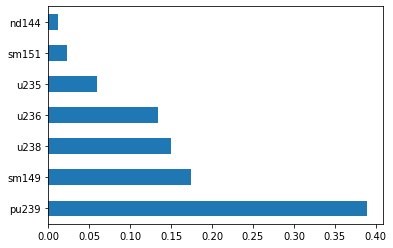

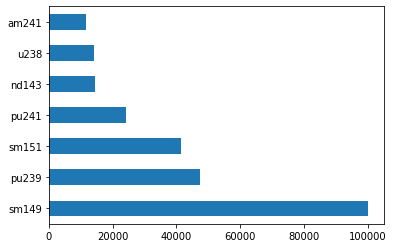

In [23]:
rxtr_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
rxtr_f_scores.nlargest(n).plot(kind='barh')
plt.show()
#rxtr_chi_scores.nlargest(n).plot(kind='barh')
#plt.show()

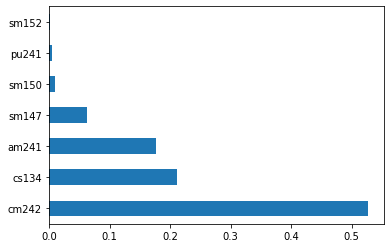

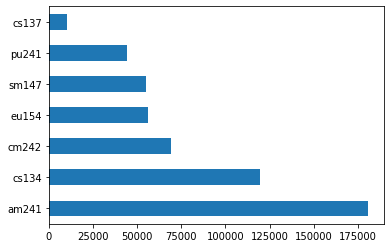

In [24]:
cool_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
cool_f_scores.nlargest(n).plot(kind='barh')
plt.show()
#cool_mi_scores.nlargest(n).plot(kind='barh')
#plt.show()

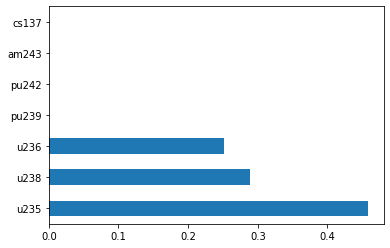

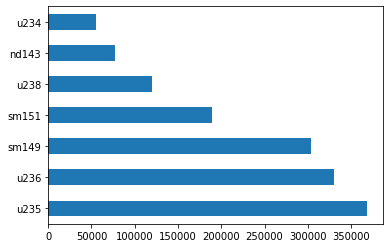

In [25]:
enri_tree_impt.nlargest(n).plot(kind='barh')
plt.show()
enri_f_scores.nlargest(n).plot(kind='barh')
plt.show()
#enri_mi_scores.nlargest(n).plot(kind='barh')
#plt.show()

In [57]:
dtree_nlargest = [x.nlargest(n) for x in [burn_tree_impt, rxtr_tree_impt, cool_tree_impt, enri_tree_impt]]
dtree_list = [x.index.tolist() for x in dtree_nlargest]
dtree_isos = list(set([x for sublist in dtree_list for x in sublist]))
dtree_isos.sort()
print(len(dtree_isos), dtree_isos)

21 ['am241', 'am243', 'cm242', 'cs134', 'cs137', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'pu242', 'sm147', 'sm149', 'sm150', 'sm151', 'sm152', 'u235', 'u236', 'u238']


In [58]:
kbest_nlargest = [x.nlargest(n) for x in [burn_f_scores, rxtr_f_scores, cool_f_scores, enri_f_scores]]
kbest_list = [x.index.tolist() for x in kbest_nlargest]
kbest_isos = list(set([x for sublist in kbest_list for x in sublist]))
kbest_isos.sort()
print(len(kbest_isos), kbest_isos)

21 ['am241', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'u234', 'u235', 'u236', 'u238']


#### Intersection

In [59]:
intersection = list(set(dtree_isos) & set(kbest_isos))
intersection.sort()
print(len(intersection), intersection)

18 ['am241', 'cm242', 'cs134', 'cs137', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'sm147', 'sm149', 'sm150', 'sm151', 'u235', 'u236', 'u238']


#### Union

In [60]:
union = list(set(dtree_isos) | set(kbest_isos))
union.sort()
print(len(union), union)

24 ['am241', 'am243', 'cm242', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd145', 'nd146', 'nd148', 'nd150', 'pu239', 'pu241', 'pu242', 'sm147', 'sm149', 'sm150', 'sm151', 'sm152', 'u234', 'u235', 'u236', 'u238']
